In [11]:
import numpy as np
from sklearn.manifold import TSNE
import torch
from transformers import BertConfig, BertModel, BertTokenizer
from transformers import BertForMaskedLM, BertTokenizerFast, pipeline
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from umap import UMAP

In [2]:
config = BertConfig.from_json_file("config.json")
model = BertForMaskedLM.from_pretrained('/home/customer/hyr/matbert-uncased（copy-version）')
tokenizer = BertTokenizerFast.from_pretrained('/home/customer/hyr/matbert-uncased（copy-version）', do_lower_case=False)
# unmasker = pipeline('fill-mask', model=model, tokenizer=tokenizer)

In [9]:
# 提取所有词向量
all_word_embeddings = []
for word in tokenizer.vocab.keys():
    if word.isalnum():  # 只选择字母数字组合的词，排除特殊标记
        token_id = tokenizer.encode(word, add_special_tokens=False)
        if len(token_id) == 1:  # 确保词没有分词成多个子词
            token_id = torch.tensor(token_id).unsqueeze(0)
            embeddings = model.bert.embeddings.word_embeddings(token_id)
            all_word_embeddings.append(embeddings.squeeze().detach().numpy())

all_word_embeddings = np.array(all_word_embeddings)

In [14]:

from umap import UMAP
# 使用UMAP进行降维
reducer = UMAP()
embeddings_umap = reducer.fit_transform(all_word_embeddings)


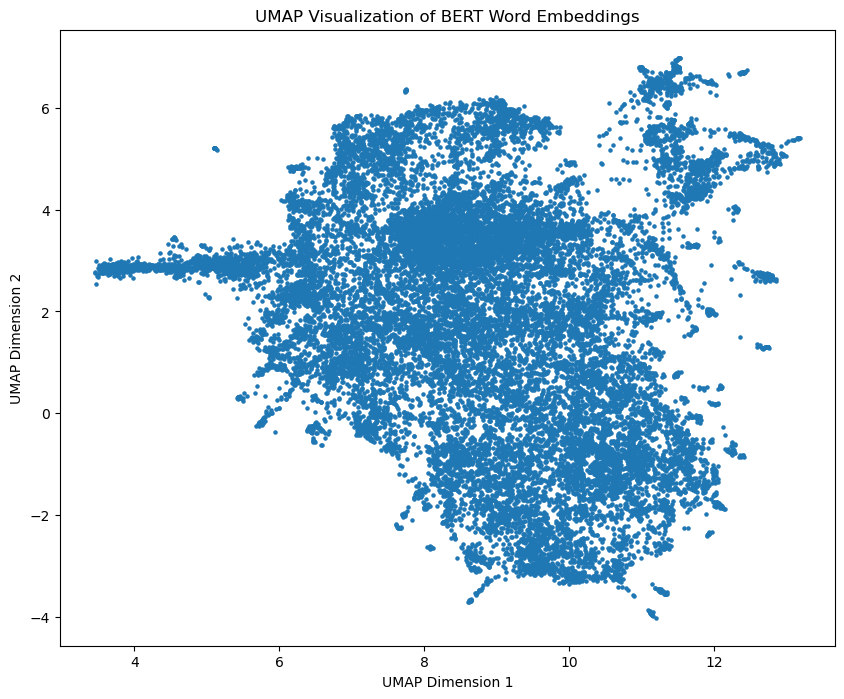

In [15]:
# 可视化降维后的词向量
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], s=5)
plt.title('UMAP Visualization of BERT Word Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

In [ ]:
# ----------------------------------------------------------

In [17]:
# 提取所有词向量
all_word_embeddings = []
all_words = []
for word in tokenizer.vocab.keys():
    if word.isalnum():  # 只选择字母数字组合的词，排除特殊标记
        token_id = tokenizer.encode(word, add_special_tokens=False)
        if len(token_id) == 1:  # 确保词没有分词成多个子词
            token_id = torch.tensor(token_id).unsqueeze(0)
            embeddings = model.bert.embeddings.word_embeddings(token_id)
            all_word_embeddings.append(embeddings.squeeze().detach().numpy())
            all_words.append(word)

all_word_embeddings = np.array(all_word_embeddings)

In [19]:
from umap import UMAP
# 使用UMAP进行降维
reducer = UMAP()
embeddings_umap = reducer.fit_transform(all_word_embeddings)


In [ ]:
# 需要高亮的词汇
highlighted_words = ['perovskite',]
# 可视化降维后的词向量
plt.figure(figsize=(10, 8))
for i, word in enumerate(all_words):
    if word in highlighted_words:
        plt.scatter(embeddings_umap[i, 0], embeddings_umap[i, 1], color='green', s=20)
        plt.text(embeddings_umap[i, 0], embeddings_umap[i, 1], word, fontsize=8, ha='left', va='bottom')
    else:
        plt.scatter(embeddings_umap[i, 0], embeddings_umap[i, 1], color='gray', s=5)

plt.title('UMAP Visualization of BERT Word Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()